In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
digits = load_digits()
digits.data.shape

(1797, 64)

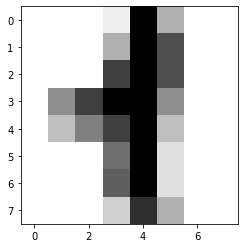

In [4]:
plt.imshow( digits.data[85].reshape(8, 8), 
            cmap='binary', interpolation='nearest',
            clim=(0, 16))

In [5]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


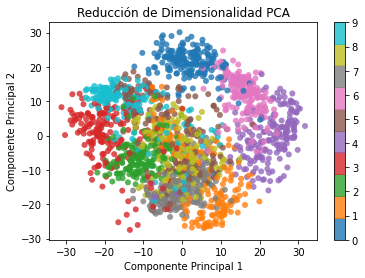

In [6]:
plt.scatter( projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('tab10', 10) )
plt.title('Reducción de Dimensionalidad PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar();

In [7]:
import time

#para medir el tiempo
time_start = time.time()

# con **verbose** le indicamos que muestre detalles del proceso
# **n_iter**:  es el número de iteraciones límite, en caso que no converja
# **perplexity**: nos indica aproximadamente cuántos vecinos tomar en cuenta por cada punto 
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)

X_embedded = tsne.fit_transform(digits.data)
print('¡t-SNE listo! Tiempo transcurrido: {} segundos'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.004s...
[t-SNE] Computed neighbors for 1797 samples in 0.269s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 8.121134
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.035240
[t-SNE] KL divergence after 300 iterations: 1.065772
¡t-SNE listo! Tiempo transcurrido: 1.7394700050354004 segundos


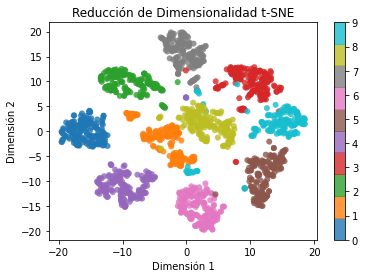

In [8]:
plt.scatter( X_embedded[:, 0], X_embedded[:, 1],
            c=digits.target, edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('tab10', 10) )
plt.title('Reducción de Dimensionalidad t-SNE')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.colorbar();